<a href="https://colab.research.google.com/github/JunHill/CS114.K21.KHTN/blob/master/Case_study_sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment of Sarcasm detection
## Member
Nguyen Quoc Cuong-18520206

Nguyen Trung Hieu-18520750
## Problem
In this assignment, we present our study for the problem of sarcasm detection. with a headline is our input, we need to predict whether it is sarcastic.

## Dataset
Training set used is the [News Headlines dataset from Kaggle](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection). The test set is 2000 headlines collected from [TheOnion](https://www.theonion.com/) and [Huffpost](https://www.huffpost.com/).



In [ ]:
#----------------------------
#Download the traing set. Here it is a json file we added to Drive
#----------------------------
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=11VkdtYSCDA0U_LeN_OB8LWWhz5ghv7CQ' -O sarcasm.json

--2020-06-25 16:08:11--  https://docs.google.com/uc?export=download&id=11VkdtYSCDA0U_LeN_OB8LWWhz5ghv7CQ
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.113, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jq352as21nnljvr1t3ts19afea8acipf/1593101250000/11017606327132601540/*/11VkdtYSCDA0U_LeN_OB8LWWhz5ghv7CQ?e=download [following]
--2020-06-25 16:08:11--  https://doc-0s-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jq352as21nnljvr1t3ts19afea8acipf/1593101250000/11017606327132601540/*/11VkdtYSCDA0U_LeN_OB8LWWhz5ghv7CQ?e=download
Resolving doc-0s-1c-docs.googleusercontent.com (doc-0s-1c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0s-1c-docs.googleusercontent.com (doc-0s-1c-do

In [ ]:
#----------------------------
#Download 2 files; each of which contains links used for crawling
#----------------------------
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ND-bu6uoYtADVDycLzN8InyE-OElfXHn' -O huff.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gSViehnnLPA6JAMe14MXPH5PgerEI5OO' -O onion.txt


--2020-06-25 16:08:15--  https://docs.google.com/uc?export=download&id=1ND-bu6uoYtADVDycLzN8InyE-OElfXHn
Resolving docs.google.com (docs.google.com)... 74.125.142.139, 74.125.142.101, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/md36rt5qc7qs8saddjrp9no7do1v5gv9/1593101250000/18346346175397298185/*/1ND-bu6uoYtADVDycLzN8InyE-OElfXHn?e=download [following]
--2020-06-25 16:08:16--  https://doc-08-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/md36rt5qc7qs8saddjrp9no7do1v5gv9/1593101250000/18346346175397298185/*/1ND-bu6uoYtADVDycLzN8InyE-OElfXHn?e=download
Resolving doc-08-2o-docs.googleusercontent.com (doc-08-2o-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-08-2o-docs.googleusercontent.com (doc-08-2o-do

In [ ]:
#-------------------------------------
# Import the libraries
#-------------------------------------
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier    
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
import pandas as pd
import requests
from lxml import html
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.classification module is  deprecated in version 0.22 and wi

# Data Crawling

Using **requests** to fetch html data from websites and use **lxml** to analyze the structure and get the news headlines.

In [ ]:
#JSON form
def createData():
    data = {}
    data["article_link"] = ""
    data["headline"] = ""
    data["is_sarcastic"] = ""
    return data

In [ ]:
#write data to JSON file
def writeJSON(data, articles,links, writeFile, is_sarcastic):
    for i in range(len(articles)):
        data["article_link"] = links[i]
        data["headline"] = articles[i]
        data["is_sarcastic"] = is_sarcastic
        with open(writeFile, "a+", encoding='utf8') as outfile:
            json.dump(data, outfile,ensure_ascii=False)
            outfile.write("\n")
        outfile.close()
    print('Done writing!')

In [ ]:
#fetching data from links
def getNews(link, headline_Xpath, href_Xpath):
    h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}

    response = requests.get(link, headers=h)
    print(f'{link}: {response}')
    tree = html.fromstring(response.content)
    return tree.xpath(headline_Xpath), tree.xpath(href_Xpath), response.status_code

In [ ]:
#Each Onion link (news in brief through time) have 20 article headers, append each of them to the array
TheOnion = []
with open('onion.txt', 'r') as readFile:
    l = readFile.readline()
    while l:
        TheOnion.append(l)
        l = readFile.readline()
readFile.close()

#find header class and read it
for l in TheOnion:
    onion_articles, onion_links, status = getNews(l,
                            '//*[@class="cw4lnv-0 iTueKC js_post_item"]/div[3]/div/div[2]/a/h2/text()',
                            '//*[@class="cw4lnv-0 iTueKC js_post_item"]/div[3]/div/div[2]/a/@href'
                                     )
    #ignore anti-crawler
    if(len(onion_links) != len(onion_articles)) or status != 200:
        print(f"Error with {l}!")
        continue
    onion_data = createData()
    writeJSON(onion_data, onion_articles, onion_links, 'news.json', 1)

#same here
TheHuff = []
with open('huff.txt', 'r') as readFile:
    l = readFile.readline()
    while l:
        TheHuff.append(l[0:len(l)-1])
        l = readFile.readline()

for l in TheHuff:
    huff_articles, huff_links, status = getNews(l,
                            '//*[@class="card__headline__text"]/text()',
                            '//a[@class="card__headline card__headline--long"]/@href | //a[@class="card__headline"]/@href'
                                     )

    if(len(huff_links) != len(huff_articles)) or status != 200:
        print(f"Error with {l}!")
        continue
    huff_data = createData()
    writeJSON(huff_data, huff_articles, huff_links, 'news.json', 0)

https://www.theonion.com/c/news-in-brief
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1592311200653
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1591726080182
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1591127280478
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1590584520209
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1589894280339
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1589294340828
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1588711020164
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1588080060229
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?startTime=1587147720532
: <Response [200]>
Done writing!
https://www.theonion.com/c/news-in-brief?sta

In [ ]:
#--------------------------
# Load data from our json files
#--------------------------
test_news = pd.read_json('/content/news.json', lines=True)
train_news = pd.read_json('/content/sarcasm.json', lines=True)

print(test_news[:5])
print(train_news[:5])

                                        article_link  ... is_sarcastic
0  https://politics.theonion.com/nancy-pelosi-cal...  ...            1
1  https://ogn.theonion.com/gamers-we-just-spent-...  ...            1
2  https://www.theonion.com/defiant-florida-offic...  ...            1
3  https://www.theonion.com/employee-leaves-perfo...  ...            1
4  https://www.theonion.com/officials-warn-defund...  ...            1

[5 rows x 3 columns]
                                        article_link  ... is_sarcastic
0  https://www.huffingtonpost.com/entry/versace-b...  ...            0
1  https://www.huffingtonpost.com/entry/roseanne-...  ...            0
2  https://local.theonion.com/mom-starting-to-fea...  ...            1
3  https://politics.theonion.com/boehner-just-wan...  ...            1
4  https://www.huffingtonpost.com/entry/jk-rowlin...  ...            0

[5 rows x 3 columns]


In [ ]:
#---------------------
# Use these 2 dictionaries to store our models
#---------------------
tfidf_model = {}
bow_model = {}

# Feature engineering, model selection and hyperparameter tuning
Here, we try 2 approaches of feature engineering. Firstly, we use bag of words which aims to treat the number of each word as a feature. Scikit-learn has supported it with CountVectorizer module. Secondly, we try adding weight to present the important of a feature in the previous approach. It can be obtained by using the TfidfVectorizer(term-frequent inverse document frequent) module.  

Since this is a binary classify problem, we decide to try 3 models: logistic classify, perceptron learning algorithm and SVM. We also tune the alpha parameter with these 3 models in the case of tfidf feature extraction. In addition, with tfidf, we try 4 more models which are extra trees classify, decision tree, KNN, onevsall classify.  

## Bag of words

In [ ]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
X_train = ngram_vectorizer.fit_transform(train_news["headline"]).toarray().astype(int)

test_ngram_vectorizer = CountVectorizer(vocabulary=ngram_vectorizer.get_feature_names())
X_test = test_ngram_vectorizer.fit_transform(test_news["headline"]).toarray().astype(int)
Y_test, Y_train = test_news["is_sarcastic"], train_news["is_sarcastic"]

In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(loss='perceptron',max_iter=5000, tol=1e-3)).fit(X_train, Y_train)
bow_model['perceptron'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))

Performance on train set:0.7054550900445543
Performance on test set:0.4648622981956315


In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(loss='log',max_iter=1000, tol=1e-3)).fit(X_train, Y_train)
bow_model['logistic'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))

Performance on train set:0.7560747313639598
Performance on test set:0.5151946818613485


In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(max_iter=1000, tol=1e-3)).fit(X_train, Y_train)
bow_model['SVM'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))

Performance on train set:0.7464150660825939
Performance on test set:0.4838556505223172


The performance on training set is low. It is even lower with the test set. We decide to solve the underfitting problem first. Next, we will try another feature extraction method.

## Term frequency-inverse document frequency 

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(list(train_news["headline"]))
print(vectorizer.get_feature_names())

test_vectorizer = TfidfVectorizer(vocabulary=vectorizer.get_feature_names())

X_test = test_vectorizer.fit_transform(list(test_news["headline"]))

Y_test, Y_train = test_news['is_sarcastic'], train_news['is_sarcastic']

print((X_test.toarray()).shape)
print(len(Y_test))
print((X_train.toarray()).shape)
print(len(Y_train))

['00', '000', '00000000001', '00003', '000th', '025', '03', '047', '071', '10', '100', '100th', '102', '103', '104', '105', '106', '107', '108', '109', '10th', '10ths', '11', '110', '112', '112th', '113', '113th', '114', '115', '116', '117', '11717', '118', '11th', '12', '120', '122', '125', '12th', '13', '130', '134', '135', '137', '138', '14', '140', '141', '142', '145', '146', '147', '14th', '15', '150', '155th', '156', '1580s', '159', '15s', '15th', '16', '160', '161', '165', '16th', '17', '170', '1743', '175', '1776', '17th', '18', '180', '1822', '1850', '186', '1861', '1893', '18th', '19', '1913', '1914', '1915', '1919', '1927', '1928', '193', '1930s', '1937', '1939', '194', '1940', '1945', '1948', '1950s', '1960s', '1963', '1964', '1967', '1969', '1970', '1971', '1972', '1973', '1980', '1980s', '1981', '1982', '1983', '1984', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '2000s'

### Logistic Classify

In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(loss='log',max_iter=1000, tol=1e-3)).fit(X_train, Y_train)
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))
non_tuning_score = clf.score(X_test, Y_test)

Performance on train set:1.0
Performance on test set:0.7402659069325735


The model is being overfitting. We will try tuning the alpha parameter, which in turn controls the affect of regularization to our model. Beside, we split training set into traning set and validation set. We choose the model that gives the highest score on validation set and test it on test set again 

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size = 0.25)

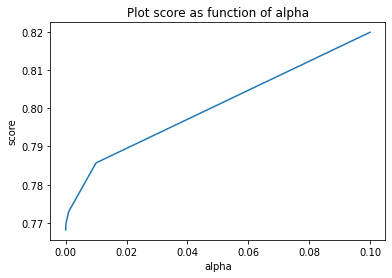

In [ ]:
clf_set = []
alpha_set = []
score_set = []
for alpha in range(-5,0):
  alpha = 10**alpha
  alpha_set.append(alpha)
  clf = make_pipeline(StandardScaler(with_mean=False),
                      SGDClassifier(alpha=alpha, loss='log',max_iter=1000, tol=1e-3)).fit(x_train, y_train)
  clf_set.append(clf)
  score_set.append(clf.score(x_val, y_val))

tfidf_model['logistic'] = clf_set[score_set.index(max(score_set))]
plt.title('Plot score as function of alpha')
plt.plot(alpha_set,score_set)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [ ]:
print("Performance on test set:{}".format(tfidf_model['logistic'].score(X_test, Y_test)))
print("Improvement:{}".format(tfidf_model['logistic'].score(X_test, Y_test)-non_tuning_score))

Performance on test set:0.7787274453941121
Improvement:0.03846153846153855


It has grown from 74% to 77%. We will use the same process for SVM and Perceptron learning algorithm

### SVM 

In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(max_iter=1000, tol=1e-3)).fit(X_train, Y_train)
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))
non_tuning_score = clf.score(X_test, Y_test)

Performance on train set:0.9999625594368939
Performance on test set:0.7393162393162394


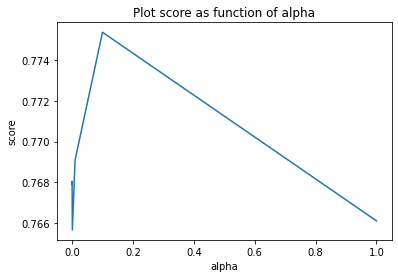

In [ ]:
clf_set = []
alpha_set = []
score_set = []
for alpha in range(-5,1):
  alpha = 10**alpha
  alpha_set.append(alpha)
  clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(max_iter=1000, tol=1e-3)).fit(x_train, y_train)
  clf_set.append(clf)
  score_set.append(clf.score(x_val, y_val))

tfidf_model['SVM'] = clf_set[score_set.index(max(score_set))]
plt.title('Plot score as function of alpha')
plt.plot(alpha_set,score_set)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [ ]:
print("Performance on test set:{}".format(tfidf_model['SVM'].score(X_test, Y_test)))
print("Improvement:{}".format(tfidf_model['SVM'].score(X_test, Y_test)-non_tuning_score))

Performance on test set:0.7502374169040835
Improvement:0.010921177587844166


### Perceptron

In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(loss='perceptron',max_iter=1000, tol=1e-3)).fit(X_train, Y_train)
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))
non_tuning_score = clf.score(X_test, Y_test)

Performance on train set:0.9996255943689393
Performance on test set:0.7421652421652422


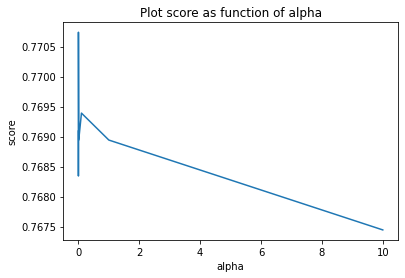

In [ ]:
clf_set = []
alpha_set = []
score_set = []
for alpha in range(-5,2):
  alpha = 10**alpha
  alpha_set.append(alpha)
  clf = make_pipeline(StandardScaler(with_mean=False),
                      SGDClassifier(loss='perceptron',max_iter=1000, tol=1e-3)).fit(x_train, y_train)
  clf_set.append(clf)
  score_set.append(clf.score(x_val, y_val))

tfidf_model['perceptron'] = clf_set[score_set.index(max(score_set))]
plt.title('Plot score as function of alpha')
plt.plot(alpha_set,score_set)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [ ]:
print("Performance on test set:{}".format(tfidf_model['perceptron'].score(X_test, Y_test)))
print("Improvement:{}".format(tfidf_model['perceptron'].score(X_test, Y_test)-non_tuning_score))

Performance on test set:0.7578347578347578
Improvement:0.015669515669515688


The improvement is not significant. 

### Extra Tree Classify

In [ ]:
extra_tree = ExtraTreeClassifier(random_state=0)
clf = BaggingClassifier(extra_tree, random_state=0).fit(X_train, Y_train)
tfidf_model['extra_tree'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))

Performance on train set:0.9904526564079523
Performance on test set:0.7203228869895536


### Decision tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf = BaggingClassifier(clf, random_state=0).fit(X_train, Y_train)
tfidf_model['decision_tree'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))

Performance on train set:0.9823280542139354
Performance on test set:0.7445394112060779


### KNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors=15).fit(X_train, Y_train)
tfidf_model['KNN'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))

Performance on train set:0.8168033247220038
Performance on test set:0.6766381766381766


### OneVsRestClassifier

In [ ]:
clf = OneVsRestClassifier(SVC()).fit(X_train, Y_train)
tfidf_model['one_vs_all'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train,Y_train),clf.score(X_test, Y_test)))

Performance on train set:0.987008124602194
Performance on test set:0.7929724596391263


# Prediction on new headlines
We write a function that take a list of strings, extraction method, model and ground truth as parameters. In case of new headline, user can feed any values for the expected result parameter, even None. We only use it for the result checking purpose. Output of this function is an array that has same length as input predicting whether a specific headline in input was sarcastic.

In [ ]:
def __predict(input, expected_result, extract_method = 'tfidf',model='one_vs_all'):
  if extract_method == 'tfidf':
    demo_vectorizer = TfidfVectorizer(vocabulary=vectorizer.get_feature_names())
    input = demo_vectorizer.fit_transform(input)
    if model not in tfidf_model:
      raise Exception("Sorry, we do not try this model or it is not existed")
    else:
      model = tfidf_model[model]
  else:
    demo_vectorizer = CountVectorizer(vocabulary=ngram_vectorizer.get_feature_names())
    input = demo_vectorizer.fit_transform(input)
    if model not in bow_model:
      raise Exception("Sorry, we do not try this model or it is not existed")
    else:
      model = bow_model[model]

  return model.predict(input), expected_result

In [ ]:
result, expected_result = __predict(["New Ultra-Reinforced Confederate Statue Includes Electrified Metal, Titanium Spikes", 
                    "Almost 1 in 3 pilots in Pakistan have fake licenses, aviation minister says",
                    "Tide Accused Of Over-Inflating Number Of Children Who Roll Around In Mud Puddles Before Running Into House" 
                    ], [1, 0, 1], extract_method='tfidf',model='one_vs_all')
print('Our prediction:')
for i in range(result.shape[0]):
  print("Headline {}: {} ({})".format(i,'Sarcastic' if result[i]==1 else "Non saracastic", expected_result[i] == result[i]))

Our prediction:
Headline 0: Sarcastic (True)
Headline 1: Non saracastic (True)
Headline 2: Sarcastic (True)


#Our comment:
- Performance on training set is much higher than on test set. This may be because of the lack of words in the training set. In other words, the test set has some new words that did not appear in the train set.   
- Using this training set, the best accuracy score we get is around 79% obtained by OneVsRestClassifier, which is much higher than the supposedly accuracy (50%) if we predict randomly.- We have already fine-tuned our regularization parameter and the resulting improvement was not much higher. This proves that overfitting in our model is not caused by model's complexity.- The most effective method to improve performance we can think of: Increasing the size of dataset to have more words in the training set.